<a href="https://colab.research.google.com/github/mehrab-karim-antor/Machine_Learning/blob/main/catVSdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import pandas as pd

# Load Dataset

In [22]:
# For X_train
df_X_train = pd.read_csv('input.csv', delimiter=',', header=None, engine='python', on_bad_lines='skip')

# For Y_train
df_Y_train = pd.read_csv('labels.csv', delimiter=',', header=None, engine='python', on_bad_lines='skip')

# Align X_train and Y_train to the minimum number of rows
min_train_rows = min(len(df_X_train), len(df_Y_train))
X_train = df_X_train.iloc[:min_train_rows, :30000].fillna(0).values
Y_train = df_Y_train.iloc[:min_train_rows].values

# For X_test
df_X_test = pd.read_csv('input_test.csv', delimiter=',', header=None, engine='python', on_bad_lines='skip')

# For Y_test
df_Y_test = pd.read_csv('labels_test.csv', delimiter=',', header=None, engine='python', on_bad_lines='skip')

# Align X_test and Y_test to the minimum number of rows
min_test_rows = min(len(df_X_test), len(df_Y_test))
X_test = df_X_test.iloc[:min_test_rows, :30000].fillna(0).values
Y_test = df_Y_test.iloc[:min_test_rows].values

In [23]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [24]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (1359, 100, 100, 3)
Shape of Y_train:  (1359, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


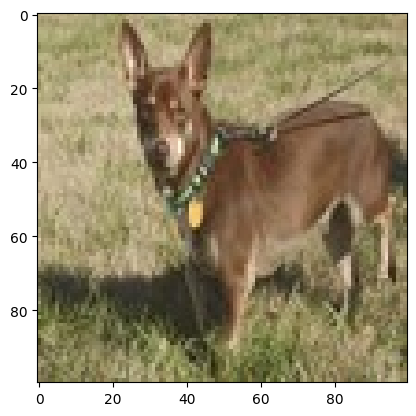

In [25]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model

In [26]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [28]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [53]:
model.fit(X_train, Y_train, epochs = 10, batch_size = 64)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 735ms/step - accuracy: 0.7828 - loss: 0.4386
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 729ms/step - accuracy: 0.8108 - loss: 0.4097
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 727ms/step - accuracy: 0.8384 - loss: 0.3923
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 704ms/step - accuracy: 0.8681 - loss: 0.3205
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 717ms/step - accuracy: 0.8883 - loss: 0.2855
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 734ms/step - accuracy: 0.9041 - loss: 0.2412
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 730ms/step - accuracy: 0.9372 - loss: 0.1785
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 722ms/step - accuracy: 0.9335 - loss: 0.1763
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 728ms/step - accuracy: 0.9743 - loss: 0.1143
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 718ms/step - accuracy: 0.9713 - loss: 0.0988


In [55]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.7450 - loss: 0.7424


[1.1034108400344849, 0.637499988079071]

# Making predictions

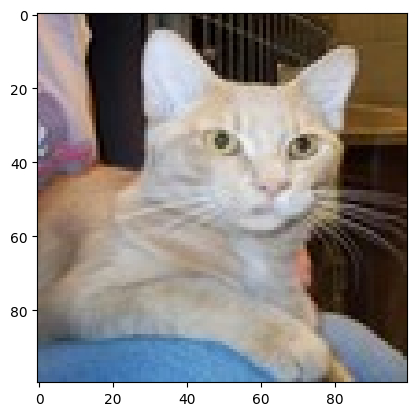

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted probability: 0.9180
Our model predicts it is a: cat


In [74]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

# Get the raw prediction probability (scalar value)
y_pred_proba = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))[0][0]

# Determine the predicted class based on the probability
if y_pred_proba > 0.5:
    predicted_label_text = 'cat'
    predicted_label_value = 1
else:
    predicted_label_text = 'dog'
    predicted_label_value = 0

# Get the actual label from Y_test
actual_label_value = Y_test[idx2][0] # Access the scalar value from the array

if actual_label_value == 0:
    actual_label_text = 'dog'
else:
    actual_label_text = 'cat'

print(f"Predicted probability: {y_pred_proba:.4f}")
print(f"Our model predicts it is a: {predicted_label_text}")
